<a href="https://colab.research.google.com/github/RubenMcCarty/Machine-Learning-con-Python-001/blob/master/Predicci%C3%B3n_Problema_Tesis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **PREDICCIÓN DE PROBLEMA PARA HACER TU TESIS USANDO ALGORITMOS DE MACHINE LEARNING** 
# 1. Primero importemos las bibliotecas necesarias:

In [1]:
import pandas as pd
import pylab as pl
import numpy as np
import scipy.optimize as opt
from sklearn import preprocessing
%matplotlib inline 
import matplotlib.pyplot as plt

# 2. Cargue los datos de egresados
DATASET COMBINADO FINAL es un archivo de datos hipotéticos sobre los EGRESADO DE LA USMP de la carrera profesional XXXX el esfuerzo de los tesistas para aumentar la base de datos de realización de tesis de los egresados.

In [2]:
df = pd.read_csv('DATASET COMBINADO FINAL.csv')
df.head()

,CODALUMNO,BD,PROGRA,ML,BI,RV,RA,TM,SL,TIN,AEX,PROBLEMA,GENERO,EDAD,ANIOEGRESO
0,1844989078,3,3,3,2,4,5,9,2,3,5,7,M,22,2015
1,4447792027,3,3,4,1,2,1,5,1,6,1,44,M,23,2019
2,4812902185,3,3,4,1,2,1,5,6,1,4,27,M,24,2016
3,9971932859,4,5,5,2,5,5,9,1,10,1,43,M,26,2015
4,2611617068,3,3,4,1,2,1,5,4,1,4,16,M,26,2015


# 3. Data Preprocesamiento y selección

In [3]:
df2 = df[['BD',	'PROGRA',	'ML',	'BI',	'RV',	'RA',	'SL',	'TIN',	'AEX','GENERO',	'EDAD', 'PROBLEMA']]
df2

,BD,PROGRA,ML,BI,RV,RA,SL,TIN,AEX,GENERO,EDAD,PROBLEMA
0,3,3,3,2,4,5,2,3,5,M,22,7
1,3,3,4,1,2,1,1,6,1,M,23,44
2,3,3,4,1,2,1,6,1,4,M,24,27
3,4,5,5,2,5,5,1,10,1,M,26,43
4,3,3,4,1,2,1,4,1,4,M,26,16
...,...,...,...,...,...,...,...,...,...,...,...,...
13994,4,5,3,3,3,1,7,3,1,F,21,45
13995,1,4,4,2,4,5,1,5,3,M,25,5
13996,4,2,4,5,4,3,2,5,4,M,21,10
13997,1,5,2,2,3,3,5,2,3,M,25,25


Seleccionemos algunas características para el modelado. También cambiamos el tipo de datos de destino para que sea entero, ya que es un requisito del algoritmo skitlearn:

In [4]:
df= df[['BD',	'PROGRA',	'ML',	'BI',	'RV',	'RA',	'SL',	'TIN',	'AEX','GENERO',	'EDAD', 'PROBLEMA']]
df['PRPBLEMA'] = df['PROBLEMA'].astype('int')
df.head()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


,BD,PROGRA,ML,BI,RV,RA,SL,TIN,AEX,GENERO,EDAD,PROBLEMA,PRPBLEMA
0,3,3,3,2,4,5,2,3,5,M,22,7,7
1,3,3,4,1,2,1,1,6,1,M,23,44,44
2,3,3,4,1,2,1,6,1,4,M,24,27,27
3,4,5,5,2,5,5,1,10,1,M,26,43,43
4,3,3,4,1,2,1,4,1,4,M,26,16,16


# Práctica
¿Cuántas filas y columnas hay en este conjunto de datos en total? ¿Cómo se llaman las columnas?

In [5]:
df.shape

(13999, 13)

Definamos X e y para nuestro conjunto de datos:

In [9]:
X = np.asarray(df[['BD',	'PROGRA',	'ML',	'BI',	'RV',	'RA',	'SL',	'TIN',	'AEX',	'EDAD']])
X[0:5]

array([[ 3,  3,  3,  2,  4,  5,  2,  3,  5, 22],
       [ 3,  3,  4,  1,  2,  1,  1,  6,  1, 23],
       [ 3,  3,  4,  1,  2,  1,  6,  1,  4, 24],
       [ 4,  5,  5,  2,  5,  5,  1, 10,  1, 26],
       [ 3,  3,  4,  1,  2,  1,  4,  1,  4, 26]])

In [10]:
y = np.asarray(df['PROBLEMA'])
y [0:5]

array([ 7, 44, 27, 43, 16])

Además, normalizamos el conjunto de datos:

In [11]:
from sklearn import preprocessing
X = preprocessing.StandardScaler().fit(X).transform(X)
X[0:5]

array([[-1.09867673e-01, -1.55173479e-01, -5.01162381e-01,
        -8.54887180e-02,  1.01316885e+00,  1.49905465e+00,
        -9.96615690e-01, -8.46680141e-01,  1.41551814e+00,
        -8.78109303e-01],
       [-1.09867673e-01, -1.55173479e-01,  3.20741576e-01,
        -8.82264059e-01, -3.28871243e-01, -8.94269679e-01,
        -1.49574359e+00,  1.98529321e-01, -1.40614551e+00,
        -2.86091766e-01],
       [-1.09867673e-01, -1.55173479e-01,  3.20741576e-01,
        -8.82264059e-01, -3.28871243e-01, -8.94269679e-01,
         9.99895907e-01, -1.54348645e+00,  7.10102225e-01,
         3.05925771e-01],
       [ 7.58589442e-01,  1.46351023e+00,  1.14264553e+00,
        -8.54887180e-02,  1.68418889e+00,  1.49905465e+00,
        -1.49574359e+00,  1.59214194e+00, -1.40614551e+00,
         1.48996084e+00],
       [-1.09867673e-01, -1.55173479e-01,  3.20741576e-01,
        -8.82264059e-01, -3.28871243e-01, -8.94269679e-01,
         1.64010882e-03, -1.54348645e+00,  7.10102225e-01,
         1.

# 4. Train /Test dataset
Bien, dividimos nuestro conjunto de datos en tren y conjunto de prueba:

In [13]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.2, random_state=4)
print ('Train set:', X_train.shape,  y_train.shape)
print ('Test set:', X_test.shape,  y_test.shape)

Train set: (11199, 10) (11199,)
Test set: (2800, 10) (2800,)


# 5. Modelado Regresión Logística con scikit-learn

Construyamos nuestro modelo usando **LogisticRegression** del paquete Scikit-learn. Esta función implementa la regresión logística y puede usar diferentes optimizadores numéricos para encontrar parámetros, incluidos los solucionadores "newton-cg", "lbfgs", "liblinear", "sag" y "saga". Puede encontrar amplia información sobre los pros y los contras de estos optimizadores si lo busca en Internet.

La versión de Regresión logística en Scikit-learn, admite regularización. La regularización es una técnica utilizada para resolver el problema de sobreajuste en modelos de Machine Learning. El parámetro C indica el **inverso de la fuerza de regularización**, que debe ser un valor flotante positivo. Los valores más pequeños especifican una regularización más fuerte. Ahora ajustemos nuestro modelo con el conjunto de entrenamiento:

In [14]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
LR = LogisticRegression(C=0.01, solver='liblinear').fit(X_train,y_train)
LR

LogisticRegression(C=0.01, solver='liblinear')

Ahora podemos predecir usando nuestro conjunto de prueba:

In [15]:
yhat = LR.predict(X_test)
yhat

array([31, 35, 16, ...,  1, 33, 38])

predict_proba devuelve estimaciones para todas las clases, ordenadas por la etiqueta de clases. Entonces, la primera columna es la probabilidad de la clase 1, P (Y = 1 | X), y la segunda columna es la probabilidad de la clase 0, P (Y = 0 | X):

In [16]:
yhat_prob = LR.predict_proba(X_test)
yhat_prob

array([[0.00819461, 0.0093271 , 0.00845961, ..., 0.02201574, 0.02187943,
        0.02845522],
       [0.01126656, 0.01103214, 0.01168075, ..., 0.02560476, 0.02618552,
        0.02364361],
       [0.02504126, 0.02125865, 0.02187145, ..., 0.01679885, 0.01829097,
        0.01644803],
       ...,
       [0.03145055, 0.02760919, 0.02873146, ..., 0.01673413, 0.01764116,
        0.01607402],
       [0.01039017, 0.01223931, 0.01161811, ..., 0.02658019, 0.02436518,
        0.02632379],
       [0.01047453, 0.01197912, 0.01285625, ..., 0.05390395, 0.04947371,
        0.04885588]])

# 6. Evaluación 

# Indice de jaccard
Probemos el índice jaccard para evaluar la precisión podemos definir jaccard como el tamaño de la intersección dividido por el tamaño de la unión de dos conjuntos de etiquetas. Si todo el conjunto de etiquetas predichas para una muestra coincide estrictamente con el conjunto verdadero de etiquetas, entonces la precisión del subconjunto es 1.0; de lo contrario, es 0.0.

In [18]:
#from sklearn.metrics import jaccard_similarity_score
#jaccard_similarity_score(y_test, yhat)

# 7. matriz de confusión 
Otra forma de ver la precisión del clasificador es mirar la matriz de confusión.

In [19]:
from sklearn.metrics import classification_report, confusion_matrix
import itertools
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    Esta función imprime y traza la matriz de confusión.
     La normalización se puede aplicar configurando 'normalize=True'.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
print(confusion_matrix(y_test, yhat, labels=[1,0]))

[[10  0]
 [ 0  0]]


Confusion matrix, without normalization
[[10  0]
 [ 0  0]]


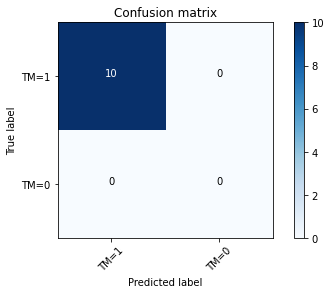

In [20]:
# Compute confusion matrix
cnf_matrix = confusion_matrix(y_test, yhat, labels=[1,0])
np.set_printoptions(precision=2)

# Plot non-normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=['TM=1','TM=0'],normalize= False,  title='Confusion matrix')

In [21]:
print (classification_report(y_test, yhat))

              precision    recall  f1-score   support

           1       0.09      0.20      0.13        51
           2       0.13      0.14      0.14        56
           3       0.10      0.40      0.15        45
           4       0.08      0.11      0.09        55
           5       0.13      0.30      0.18        46
           6       0.00      0.00      0.00        50
           7       0.00      0.00      0.00        41
           8       0.00      0.00      0.00        56
           9       0.00      0.00      0.00        52
          10       0.05      0.14      0.07        51
          11       0.00      0.00      0.00        48
          12       0.00      0.00      0.00        56
          13       0.00      0.00      0.00        48
          14       0.00      0.00      0.00        43
          15       0.00      0.00      0.00        44
          16       0.23      0.18      0.20        51
          17       0.33      0.04      0.08        46
          18       0.00    

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [25]:
# Esto se debe obviar porque nunca el yhat puede salir mas de 1 en este caso es 3.32 es porque los datos no fueron validados correctamente.

from sklearn.metrics import log_loss
log_loss(y_test, yhat_prob)

3.320962075375616

In [26]:
#Igual se debe obviar, 
LR2 = LogisticRegression(C=0.01, solver='sag').fit(X_train,y_train)
yhat_prob2 = LR2.predict_proba(X_test)
print ("LogLoss: : %.2f" % log_loss(y_test, yhat_prob2))

LogLoss: : 2.98
